In [3]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
print(os.getcwd())

/content


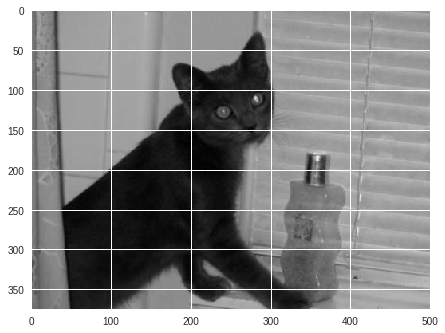

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2

# Set environment variables for os and openCV
root = "/content/drive/My Drive/Colab Notebooks/PetImages"
categories = ["Cat", "Dog"]

for category in categories:
    # Append each category to path variable
    path = os.path.join(root, category)
    for img in os.listdir(path):
        # For each category, append each image to path variable
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        # Print just the first image for now
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break  
    break

In [7]:
# Each photo is differently shaped
print(img_array.shape)

(375, 500)


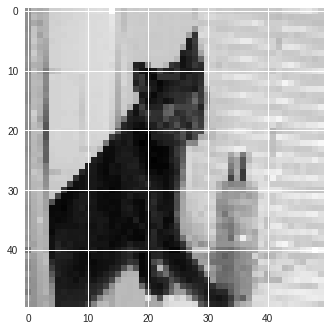

In [8]:
# We need to reshape the image but also maintain some resolution
img_size = 50
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array, cmap='gray')
plt.show()

In [0]:
training_data = []
def create_training_data():
    """Iterates through image sets, normalizes them, and appends a label."""
    for category in categories:
        # Append each category to path variable
        path = os.path.join(root, category)
        # We have to map categories to a numerical value
        class_num = categories.index(category)
        # For each category, append each image to path variable
        for img in os.listdir(path):
            # Some images may be broken
            try:
                # Grayscale, resize, and append a label
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e: # Keep output clean
                pass

create_training_data()

In [0]:
# We need to shuffle the data so the algorithm doesn't memorize it
import random

random.shuffle(training_data)

In [0]:
X = [] # Features
y = [] # Labels

# Split the features and labels from training data
for features, labels in training_data:
    X.append(features)
    y.append(labels)
    
# Reshape the array
X = np.array(X).reshape(-1, img_size, img_size, 1)

In [0]:
import pickle

# Save the data
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [2]:
"""
Here I import the data to Google's Colaboratory, where I have better success runnning tensorflow.
"""

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving y.pickle to y.pickle
Saving X.pickle to X.pickle
User uploaded file "y.pickle" with length 49948 bytes
User uploaded file "X.pickle" with length 62365166 bytes


In [5]:
X = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))

# Normalize the data
X = X/255.0 # Grayscale pixel values range from 0-255

# Initialize the model
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional models are 2D, but Dense layers require 1D datasets
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

# Set output layer and activation function
model.add(Dense(1))
model.add(Activation("sigmoid"))

# Compile the model with appropriate optimization routine
model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])


# Fit the model with appropriate parameters
model.fit(X, y, batch_size=32, epochs=3, validation_split=0.1)

Train on 22451 samples, validate on 2495 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/3
22451/22451 [==============================] - 159s 7ms/sample - loss: 0.6136 - acc: 0.6551 - val_loss: 0.5517 - val_acc: 0.7222
Epoch 2/3
22451/22451 [==============================] - 155s 7ms/sample - loss: 0.5247 - acc: 0.7423 - val_loss: 0.5096 - val_acc: 0.7575
Epoch 3/3
22451/22451 [==============================] - 154s 7ms/sample - loss: 0.4750 - acc: 0.7723 - val_loss: 0.4764 - val_acc: 0.7743
